# Probabilistic Modeling Using PyMC3

In this notebook we'll set up two very simple PyMC3 models, get sample data from the models, and plot the results.

### Importing PyMC3 and Arviz

In [1]:
import pymc3 as pm
import arviz as az

### Model of a Normal Distribution
The normal (gaussian) distribution is a common continuous probability distribution. The "probability density function" is the familiar "bell curve" (we'll plot it later):
    
$$P(x) = \frac{1}{{\sigma \sqrt {2\pi } }}e^{{{ - \left( {x - \mu } \right)^2 } \mathord{\left/ {\vphantom {{ - \left( {x - \mu } \right)^2 } {2\sigma ^2 }}} \right.} {2\sigma ^2 }}}$$
    
$$\mu \text { is the mean}$$
$$\sigma \text{ is the standard deviation}$$

In [2]:
with pm.Model() as normal_model:
    y1 = pm.Normal('y1', mu=1.0, sd=1.0)  # <=== mean of 1.0, std deviation of 1.0
    normal_trace = pm.sample(10000)     # <=== get 10000 numbers from our model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [y1]
100%|██████████| 10500/10500 [00:03<00:00, 2703.73it/s]


#### Plotting the results using the Arviz plot_trace function

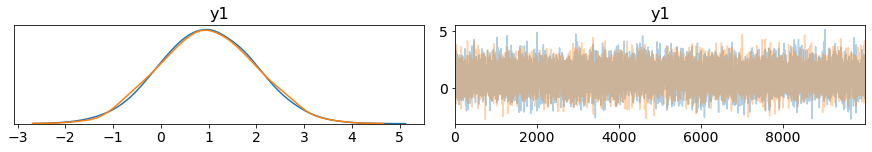

In [3]:
az.plot_trace(normal_trace);

#### Plotting the results using the Arviz "plot_posterior" function:

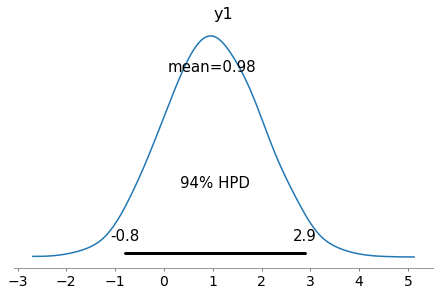

In [4]:
az.plot_posterior(normal_trace);

HPD means highest probability density

#### Summarizing the results in tabular form using the Arviz "summary" function:

In [5]:
az.summary(normal_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
y1,0.981,1.0,-0.797,2.895,0.011,0.008,8676.0,8676.0,8698.0,13326.0,1.0


### Model of a Bernoulli Distribution
The Bernoulli distribution is a discrete distribution having two possible outcomes: 1 (True) and 0 (False).  The probability mass function is given by:

$$f(x) = \theta^{x} (1-\theta)^{1-x}$$

$$\theta \text{ is the probability of a True value (1)}$$



In [6]:
with pm.Model() as bernoulli_model:
    y2 = pm.Bernoulli('y2', p=0.35)      # <=== probability of success (1 or True) is 0.35
    bernoulli_trace = pm.sample(10000)     

Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [y2]
100%|██████████| 10500/10500 [00:01<00:00, 7192.75it/s]


#### Plotting the results using the Arviz plot_trace function

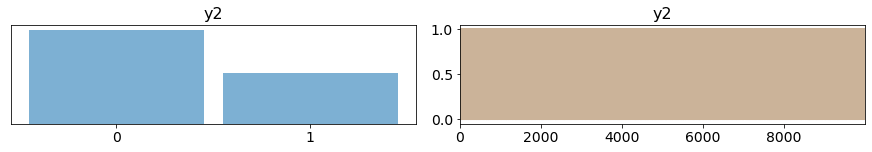

In [7]:
az.plot_trace(bernoulli_trace);


#### Plotting the results using the Arviz "plot_posterior" function:

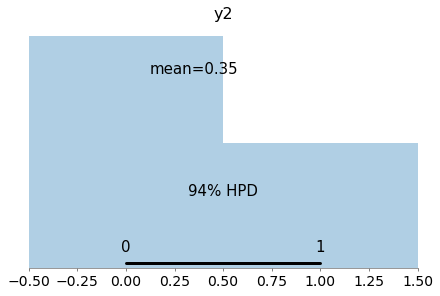

In [8]:
az.plot_posterior(bernoulli_trace);

In [9]:
az.summary(bernoulli_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
y2,0.351,0.477,0.0,1.0,0.003,0.002,33759.0,33759.0,33759.0,20000.0,1.0


## Summary

We have seen:
* Probability distributions as high-level constructs embedded in Python
* Typical continuous and discreet distributions
* How to set up a PyMC3 model and "run it forward"
* How to display the results with very little code

PyMC3 contains many other continuous, discreet, multivariate, mixture and time-series distributions.